In [1]:
def encode(df):
    le = preprocessing.LabelEncoder()
    le.fit(df)
    return(le.transform(df))



In [2]:
import pandas as pd
import geopandas as gpd
pd.options.display.max_columns = 999

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, offline
offline.init_notebook_mode(connected=True)
import plotly.express as px

from mpl_toolkits.axes_grid1 import make_axes_locatable
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)
import seaborn as sns



# For changes in .py
%reload_ext autoreload
%autoreload 2

import numpy as np

import missingno as msno

stats = ['skew', 'mad', 'kurt']


import qgrid

def qg(df):
    return(qgrid.show_grid(df,show_toolbar=True, grid_options={'forceFitColumns': False}))

import itertools
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', -1)
pd.set_option('display.max_colwidth', 100)

import requests
import json
import xmltodict
import re
import urllib.request as urllib2
import io
import yaml

import math
import pysal as ps

from pysal.esda.mapclassify import Quantiles, Equal_Interval, Fisher_Jenks


import warnings
warnings.filterwarnings('ignore')
import imageio


from sklearn import preprocessing


Populating the interactive namespace from numpy and matplotlib


/home/m/python/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy



In [3]:
df_20 = pd.read_excel('../2020/orcamento_fiscal_2020.xlsx',encoding='utf-8')
df_19 = pd.read_excel('../2019/orcamento_fiscal_2019.xlsx',encoding='utf-8')
df_18 = pd.read_excel('../2018/orcamento_fiscal_2018.xlsx',encoding='utf-8')

In [4]:
df_18['orgaos'] = df_18['orgaos'].str.split('-').apply(lambda x: x[1]).str.strip()

In [5]:
# cols = ['orgaos','unidade','programas','acao']
cols = ['orgaos','grupo despesa']
df_sankey = df_18.groupby(by = cols, as_index=False, sort=False).sum()[cols + ['valor']]
color = '#300101'

df_sankey = df_sankey.sort_values(by=cols)

In [6]:
label = df_sankey['orgaos'].tolist() + df_sankey['grupo despesa'].tolist()
# value = df_sankey['orgaos_count'].tolist() + df_sankey['grupo_count'].tolist()
df = pd.DataFrame(label,columns = ['label'])
# df['number'] = value
df = df.drop_duplicates(subset='label', keep='first')
df['number'] = [i for i in range(len(df))]

In [7]:
df_sankey = pd.merge(df_sankey,df, left_on = ['orgaos'], right_on=['label'], how = 'left', suffixes=('_orgao','_bla') ).rename(columns = {'number':'num_org'})
df_sankey = pd.merge(df_sankey,df, left_on = ['grupo despesa'], right_on=['label'], how = 'left', suffixes=('_orgao','_bla') ).rename(columns = {'number':'num_grupo'})


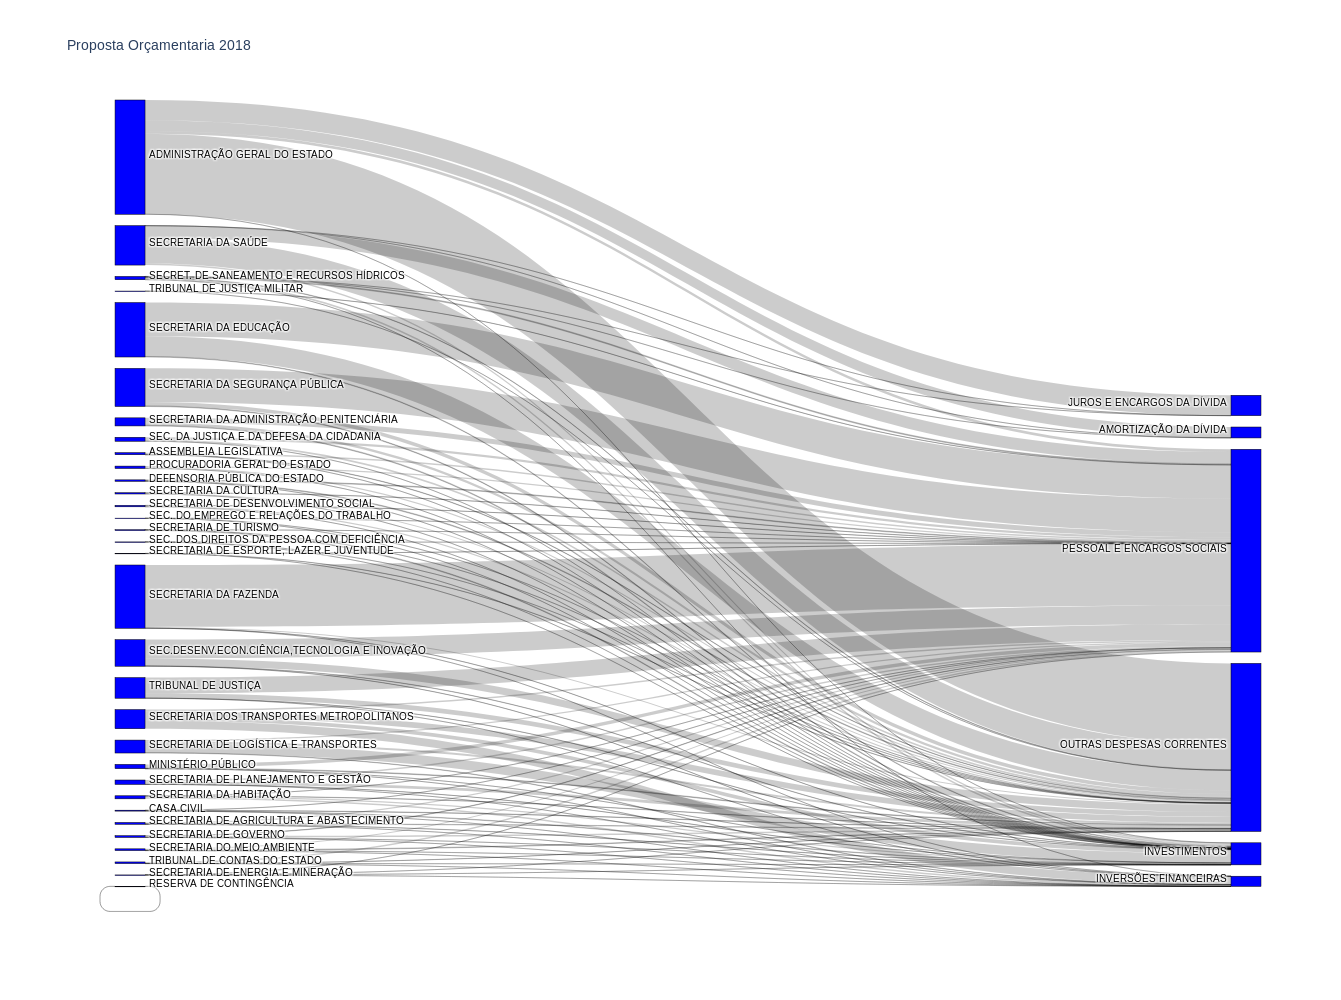

In [9]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 5,
      thickness = 30,
      line = dict(color = "black", width = 0.5),
      label = df['label'],
      color = "blue"
    ),
    link = dict(
      source = df_sankey['num_org'], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = df_sankey['num_grupo'],
      value = df_sankey['valor']
  ))])

layout =  dict(
    title = "Proposta Orçamentaria 2018",
    height = 1000,
#     width = 1400,
    font = dict(
      size = 10
    ),    
)


fig.update_layout(layout)
fig.show()

In [104]:
import json, urllib
import chart_studio.plotly as py
import pandas as pd
import numpy as np

In [105]:
url = 'https://rawgit.com/monfera/plotly-webgl-parcoords/sankey-example-01/drones.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

In [106]:
label = []
for x in data['data'][0]['nodes']:
    label.append(x['label'])
    
    
linkSource = []
linkValue = []    
linkTarget = []
linkLabel = []
for x in data['data'][0]['links']:
    linkLabel.append(x['label'])
    linkSource.append(x['source'])
    linkValue.append(x['value'])
    linkTarget.append(x['target'])

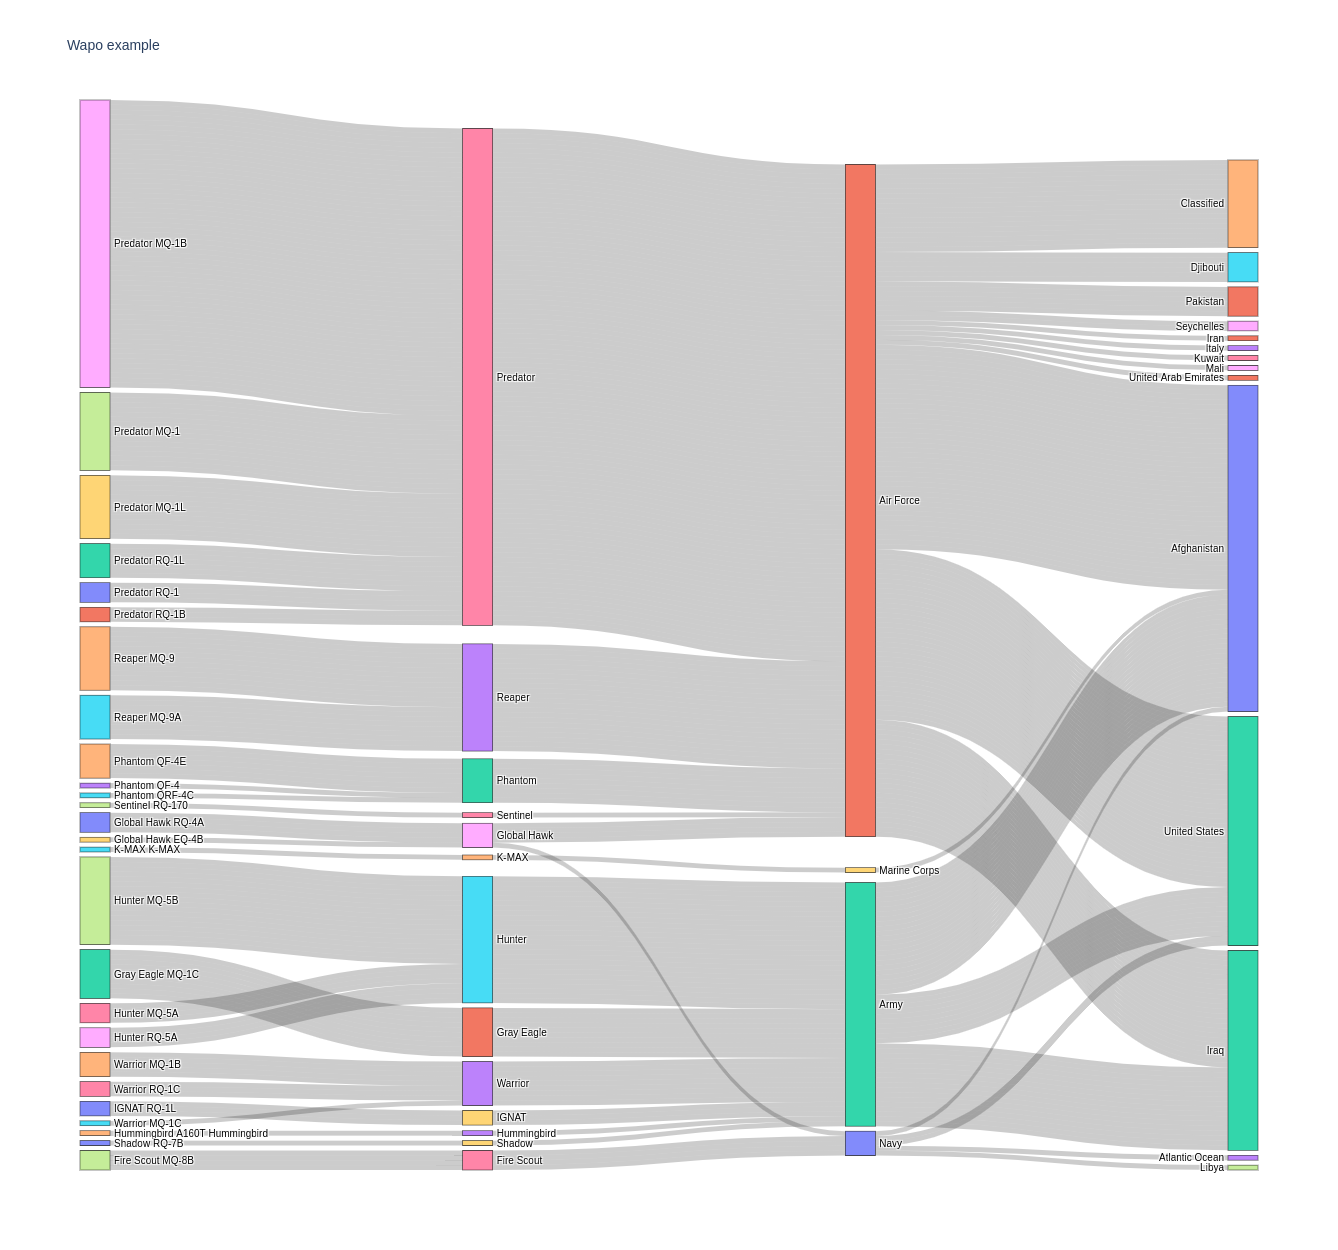

In [108]:
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 5,
      thickness = 30,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label =  label
    ),
    link = dict(
      source = linkSource,
      target = linkTarget,
      value = linkValue,
      label =  linkLabel
  )
)

layout =  dict(
    title = "Wapo example",
    height = 1250,
    width = 1000,
    font = dict(
      size = 10
    ),    
)


fig = dict(data=[data_trace], layout=layout)
iplot(fig)